In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

- step through top 10k words
- query the complete series
- bootstrap
- get largest zscore from expected
- sort, plot

In [2]:
from joblib import Memory

from lint.models import Token

mem = Memory('cache')

token_counts = mem.cache(Token.token_counts)

tokens = token_counts(10000)

In [61]:
from numpy.random import multinomial

def bootstrap(series, n=1000, *args, **kwargs):
    samples = multinomial(series.sum(), series/series.sum(), n)
    return samples / series.sum()

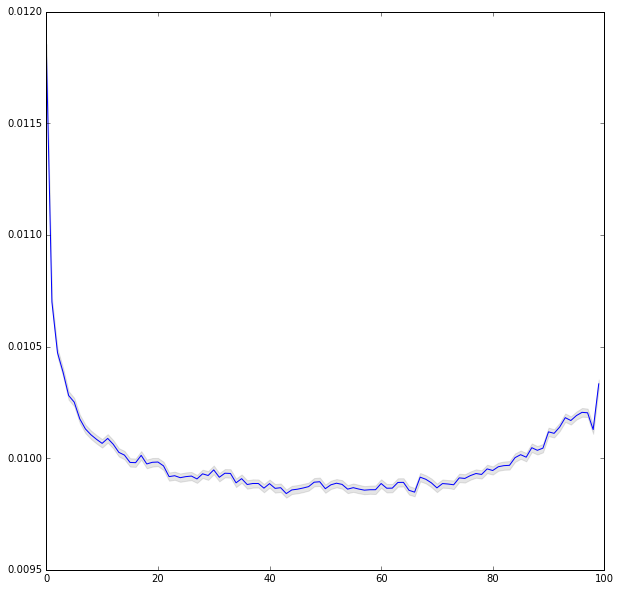

In [35]:
series = Token.token_series('the')

bs = bootstrap(series)

plt.figure(figsize=(10,10))

plt.plot(bs.mean(0))

plt.fill_between(
    range(100),
    bs.mean(0) + 2*bs.std(0),
    bs.mean(0) - 2*bs.std(0),
    color='black',
    alpha=0.1,
)

plt.show()

In [40]:
import numpy as np

zscores = np.array([
    abs(m-1/100)/std
    for m, std in zip(bs.mean(0), bs.std(0))
])

zscores.max()

182.9987801344511

# Rankings

In [74]:
def max_zscore(token):
    
    series = Token.token_series(token)

    bs = bootstrap(series)
    
    zscores = np.array([
        abs(m-1/100)/std
        for m, std in zip(bs.mean(0), bs.std(0))
        if m > 0
    ])

    return zscores.max()

In [75]:
data = [
    (token, count, max_zscore(token))
    for token, count in tokens.items()
]

In [76]:
import pandas as pd

df = pd.DataFrame(data, columns=('token', 'count', 'zscore'))

df.sort_values('zscore', ascending=False, inplace=True)

In [90]:
pd.set_option('display.max_rows', 1000)

df.head(100)

,token,count,zscore
11,you,21824060,297.698981
26,said,9383886,207.236332
5,i,32831159,196.625411
3,of,51317715,184.443891
0,the,112517604,177.280227
48,,5554106,170.179854
14,she,18628721,168.019495
428,chapter,456329,151.610087
7,he,30105265,151.604101
29,me,8684913,146.769356


In [88]:
def plot_bootstrap(token):
    
    series = Token.token_series(token)

    bs = bootstrap(series)

    plt.figure(figsize=(3,3))

    plt.plot(bs.mean(0))

    plt.fill_between(
        range(100),
        bs.mean(0) + 2*bs.std(0),
        bs.mean(0) - 2*bs.std(0),
        color='black',
        alpha=0.1,
    )

    print(token)
    plt.show()

you


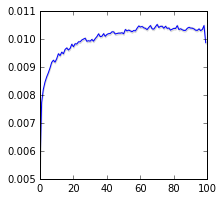

said


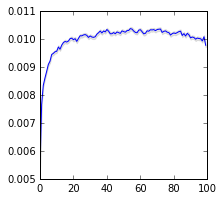

i


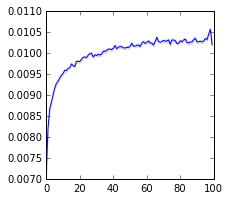

of


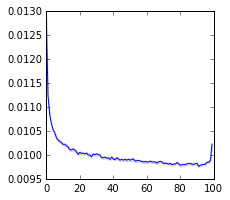

the


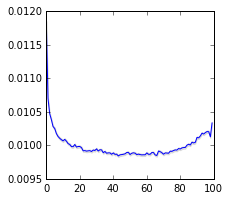

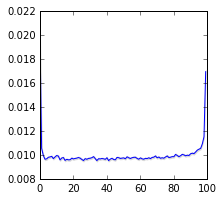

she


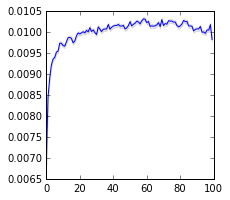

chapter


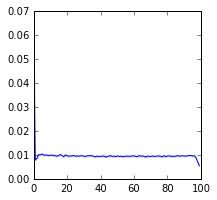

he


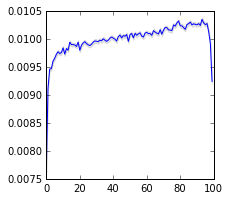

me


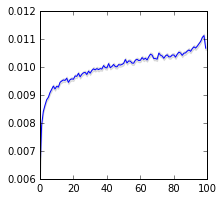

do


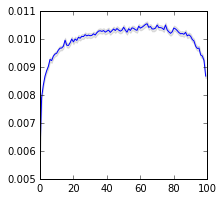

him


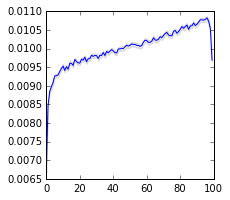

to


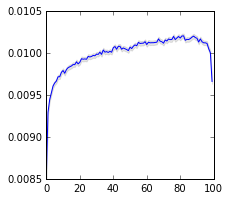

your


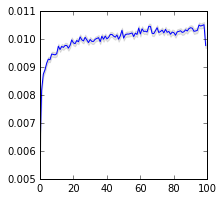

what


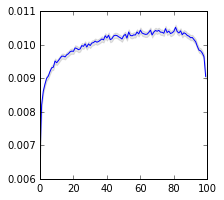

her


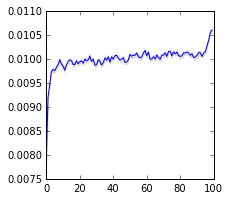

know


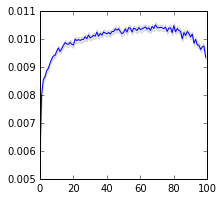

will


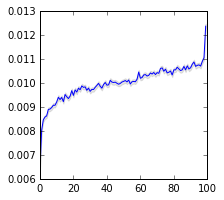

think


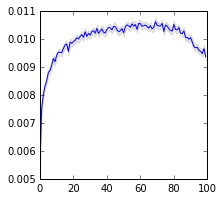

dont


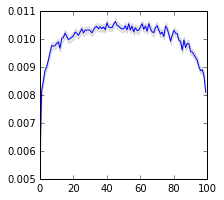

have


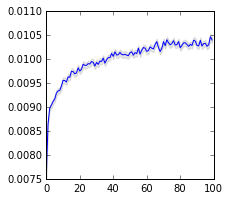

asked


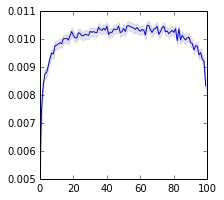

a


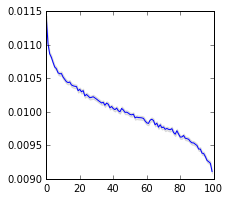

if


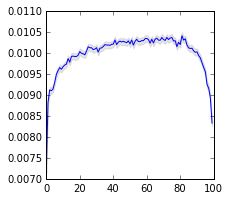

end


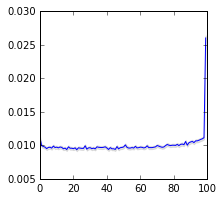

we


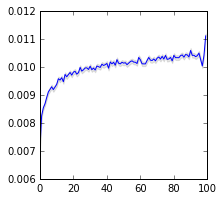

not


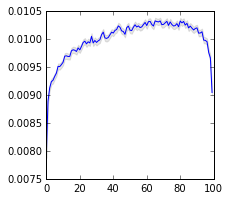

go


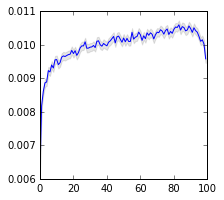

did


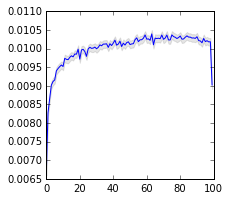

years


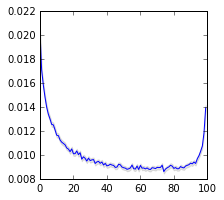

it


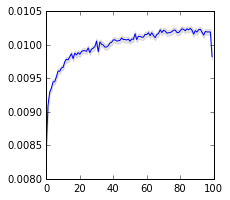

xix


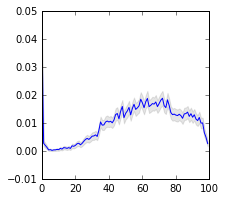

tell


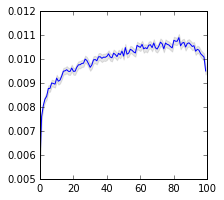

xviii


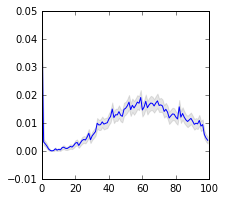

mr


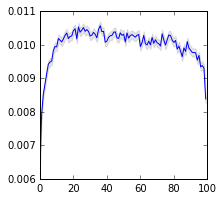

love


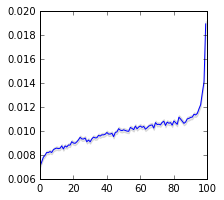

can


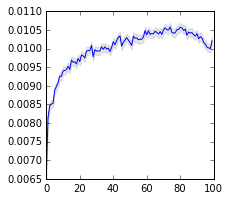

that


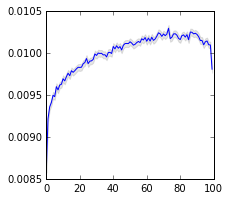

n't


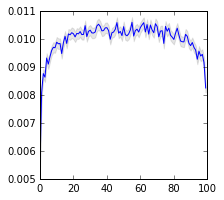

yes


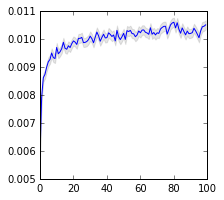

see


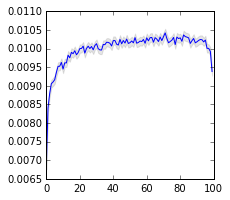

be


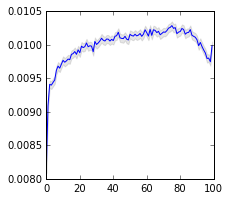

want


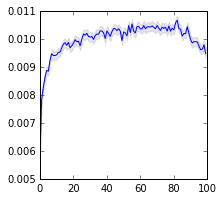

in


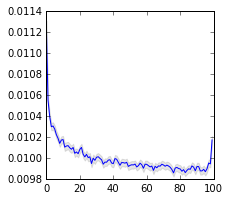

oh


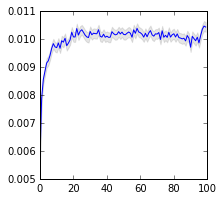

im


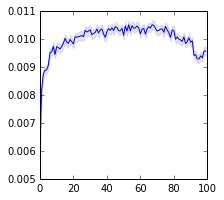

and


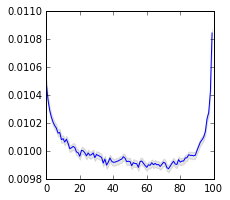

was


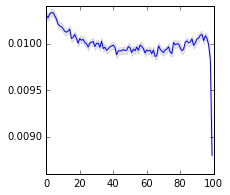

must


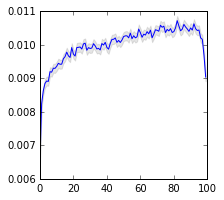

went


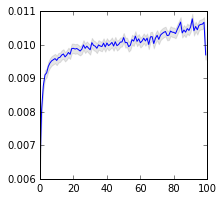

would


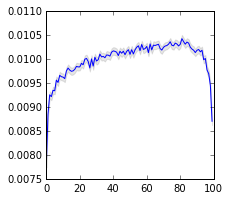

ill


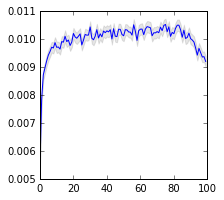

got


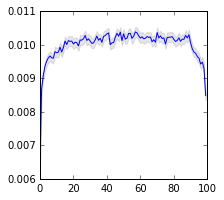

then


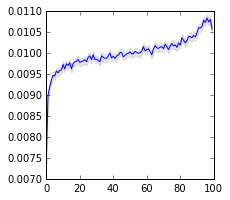

told


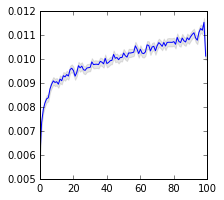

life


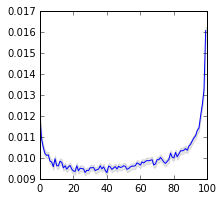

how


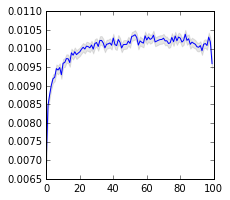

but


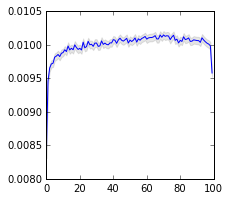

which


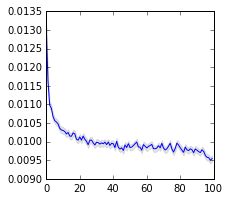

by


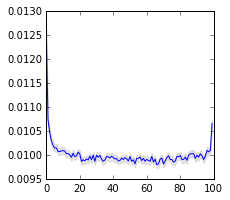

happy


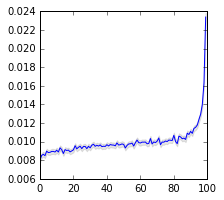

could


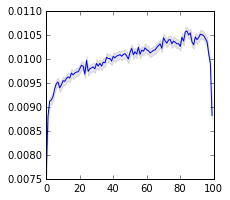

its


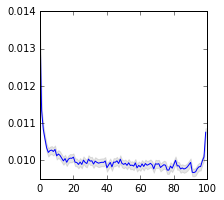

get


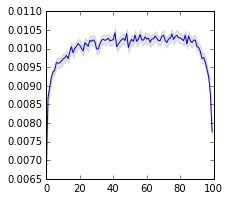

why


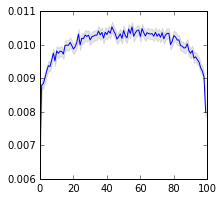

thought


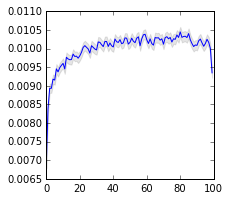

say


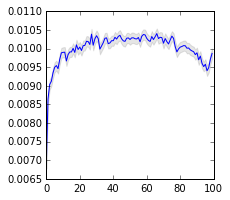

again


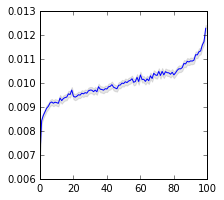

let


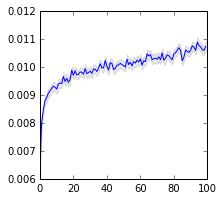

going


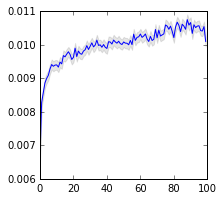

xx


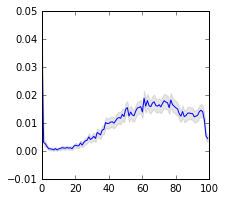

thats


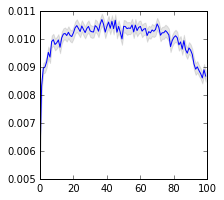

mean


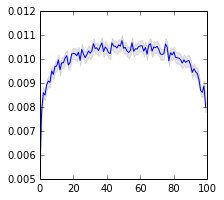

us


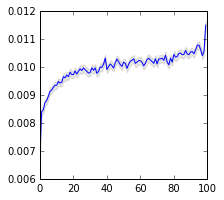

xvii


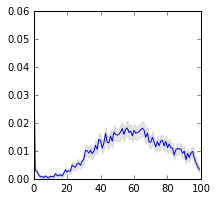

youre


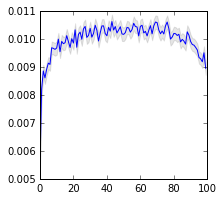

cried


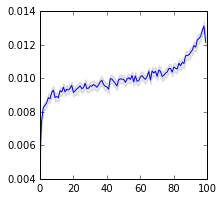

so


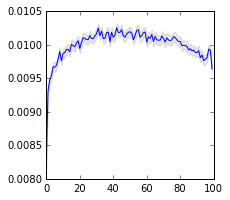

new


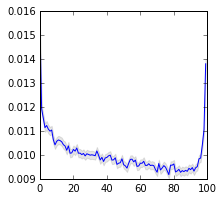

saw


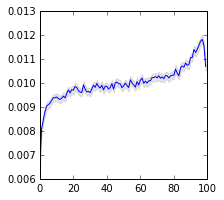

right


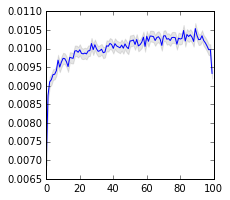

take


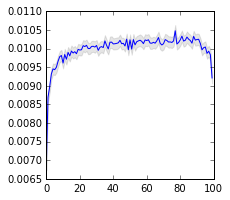

no


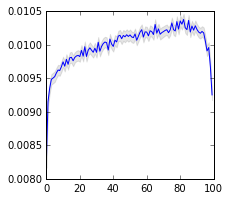

mrs


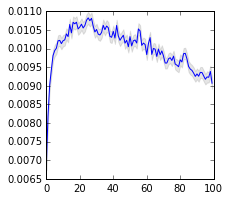

shall


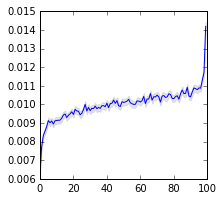

their


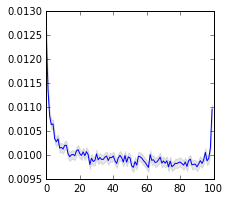

had


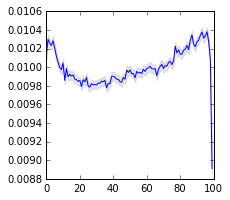

cant


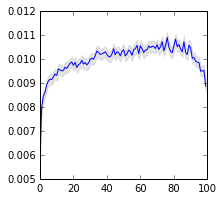

ask


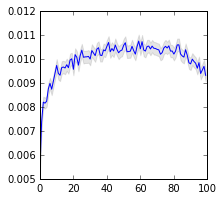

year


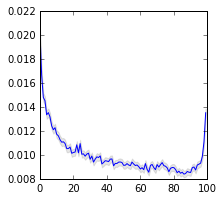

has


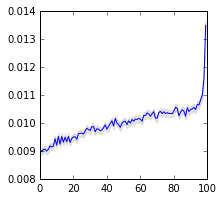

talk


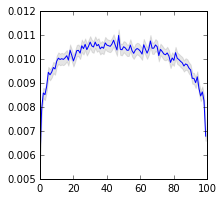

god


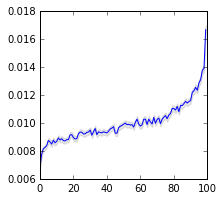

happiness


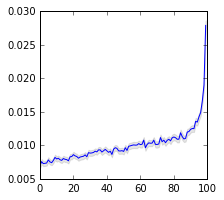

hes


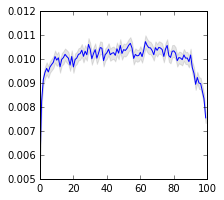

put


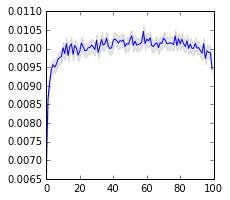

world


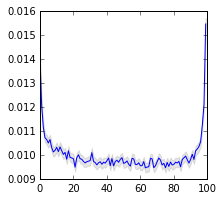

age


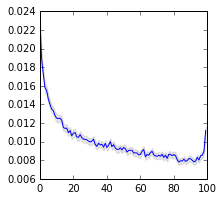

help


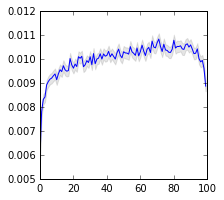

ll


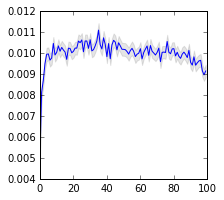

In [89]:
for i, (token, count, zscore) in df.head(100).iterrows():
    plot_bootstrap(token)